In [1]:
import sys, os
import numpy as np
import scipy as sp
from typing import List, Tuple, Callable, Any, Dict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# plt.rcParams['font.family'] = 'Helvetica'
import methods 
from methods.free_energy import nucleosome_groundstate, nucleosome_groundstate_old

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=250,precision=5,suppress=True)

### Generate stiffness and read midstep triads

In [3]:
genstiff = methods.GenStiffness(method='hybrid')   # alternatively you can use the 'crystal' method for the Olson data
# genstiff = GenStiffness(method='md')   # alternatively you can use the 'crystal' method for the Olson data
seq601 = "ATCGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCGAT"
# seq601 = "GTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATAAAAATCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTCGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACG"
# seq601 = "GTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATAAAAAGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACGTCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTC"
# seq601 = "AAAAGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACGTCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTCGTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATA"

# 601
seq = "CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT"
# seq601 = 'TTCCACATGGATAATACAAGAGATTCATCGACGTGCTCATTTGGCATTAGGGCATCATCCTAATGAGATTCGGTGGCGCTAACAACTTCGCTGAAAGATCAGTGGAGCGAACTGCCCTACTGTTAATTGGGTACCAGACCTCCTCAC'
# # seq601 = 'ATTTGGCCTTAAAAAAACTTCCCCCTTCGCTATACAAGAGATTCATCGGAAAGATCAGTGGAGCGAACTGCCCTACATCATCCTAATGAGATTCGGTGCTGTTAATTGGGTACCAGACTTCCACGCGAAAAAATCGCGGGGGCACGA'
    
# seq = 'CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC'
# seq = 'ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATA'
  
  
# seq = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
# seq = 'CCGCTCAATTGGTCGTAGACAGCTCGCACGTACGCCTGGAGAATCCCGGTGCCGAGGGCTGTCCCCCGCGTTTCCCTAGTCTTAACTCCAGGCACGTGTTAGCACCGCTTAAACCAGATATATACATCCTGTCGCCAAGGGGATTAC'

# seq = "AAAAGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACGTCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTCGTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATA"

# seq = 'CCGCTCAATTGGTCGTAGACAGCTCGCACGTACGCCTGGAGAATCCCGGTGCCGAGGGCTGTCCCCCGCGTTTCCCTAGTCTTAACTCCAGGCACGTGTTAGCACCGCTTAAACCAGATATATACATCCTGTCGCCAAGGGGATTAC'

seq = "CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT"
   
savename = 'rand'

savename = '601_corr'
    
stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
Fdict = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
print(Fdict)

gs = methods.nucleosome_groundstate(groundstate,stiffmat,midstep_constraint_locations,nuctriads)
gsv = gs.reshape((len(gs)//6,6))

gs_corr = nucleosome_groundstate(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
gs_corr_old = nucleosome_groundstate_old(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
gsv_corr = gs_corr.reshape((len(gs)//6,6))
gsv_corr_old = gs_corr_old.reshape((len(gs)//6,6))

np.save('Data/gs_' + savename + '_th.npy',gsv)
np.save('Data/gs_' + savename + '_thcorr.npy',gsv_corr)

{'F': 1546.3855286738835, 'F_entropy': 1482.9654477604167, 'F_const': 63.42008091369644, 'F_jacob': -117.89333101554986, 'F_free': 1650.2863686723167}


### compare energies

In [3]:
gs_num = np.load('Data/gs_601.npy')
# gs_num = np.load('Data/gs_rand.npy')
# # gs_num = np.load('gs_rand2.npy')
# gs_num = np.load('Data/gs_gc= 5:
    #     ax.p

# E_num = 0.5* gs_num_flat @ stiffmat @ gs_num_flat.T
# print(E_num)
# E_th = 0.5* gs @ stiffmat @ gs.T
# print(E_th)

# E_th = 0.5* gs_corr @ stiffmat @ gs_corr.T
# print(E_th)


# for i in range(6):
#     gs_cp = np.copy(gs)
#     gs_cp[i::6] = gs_num_flat[i::6]
#     E = 0.5* gs_cp @ stiffmat @ gs_cp.T
#     print(f'{i} {E}')
    


### Plot groundstate

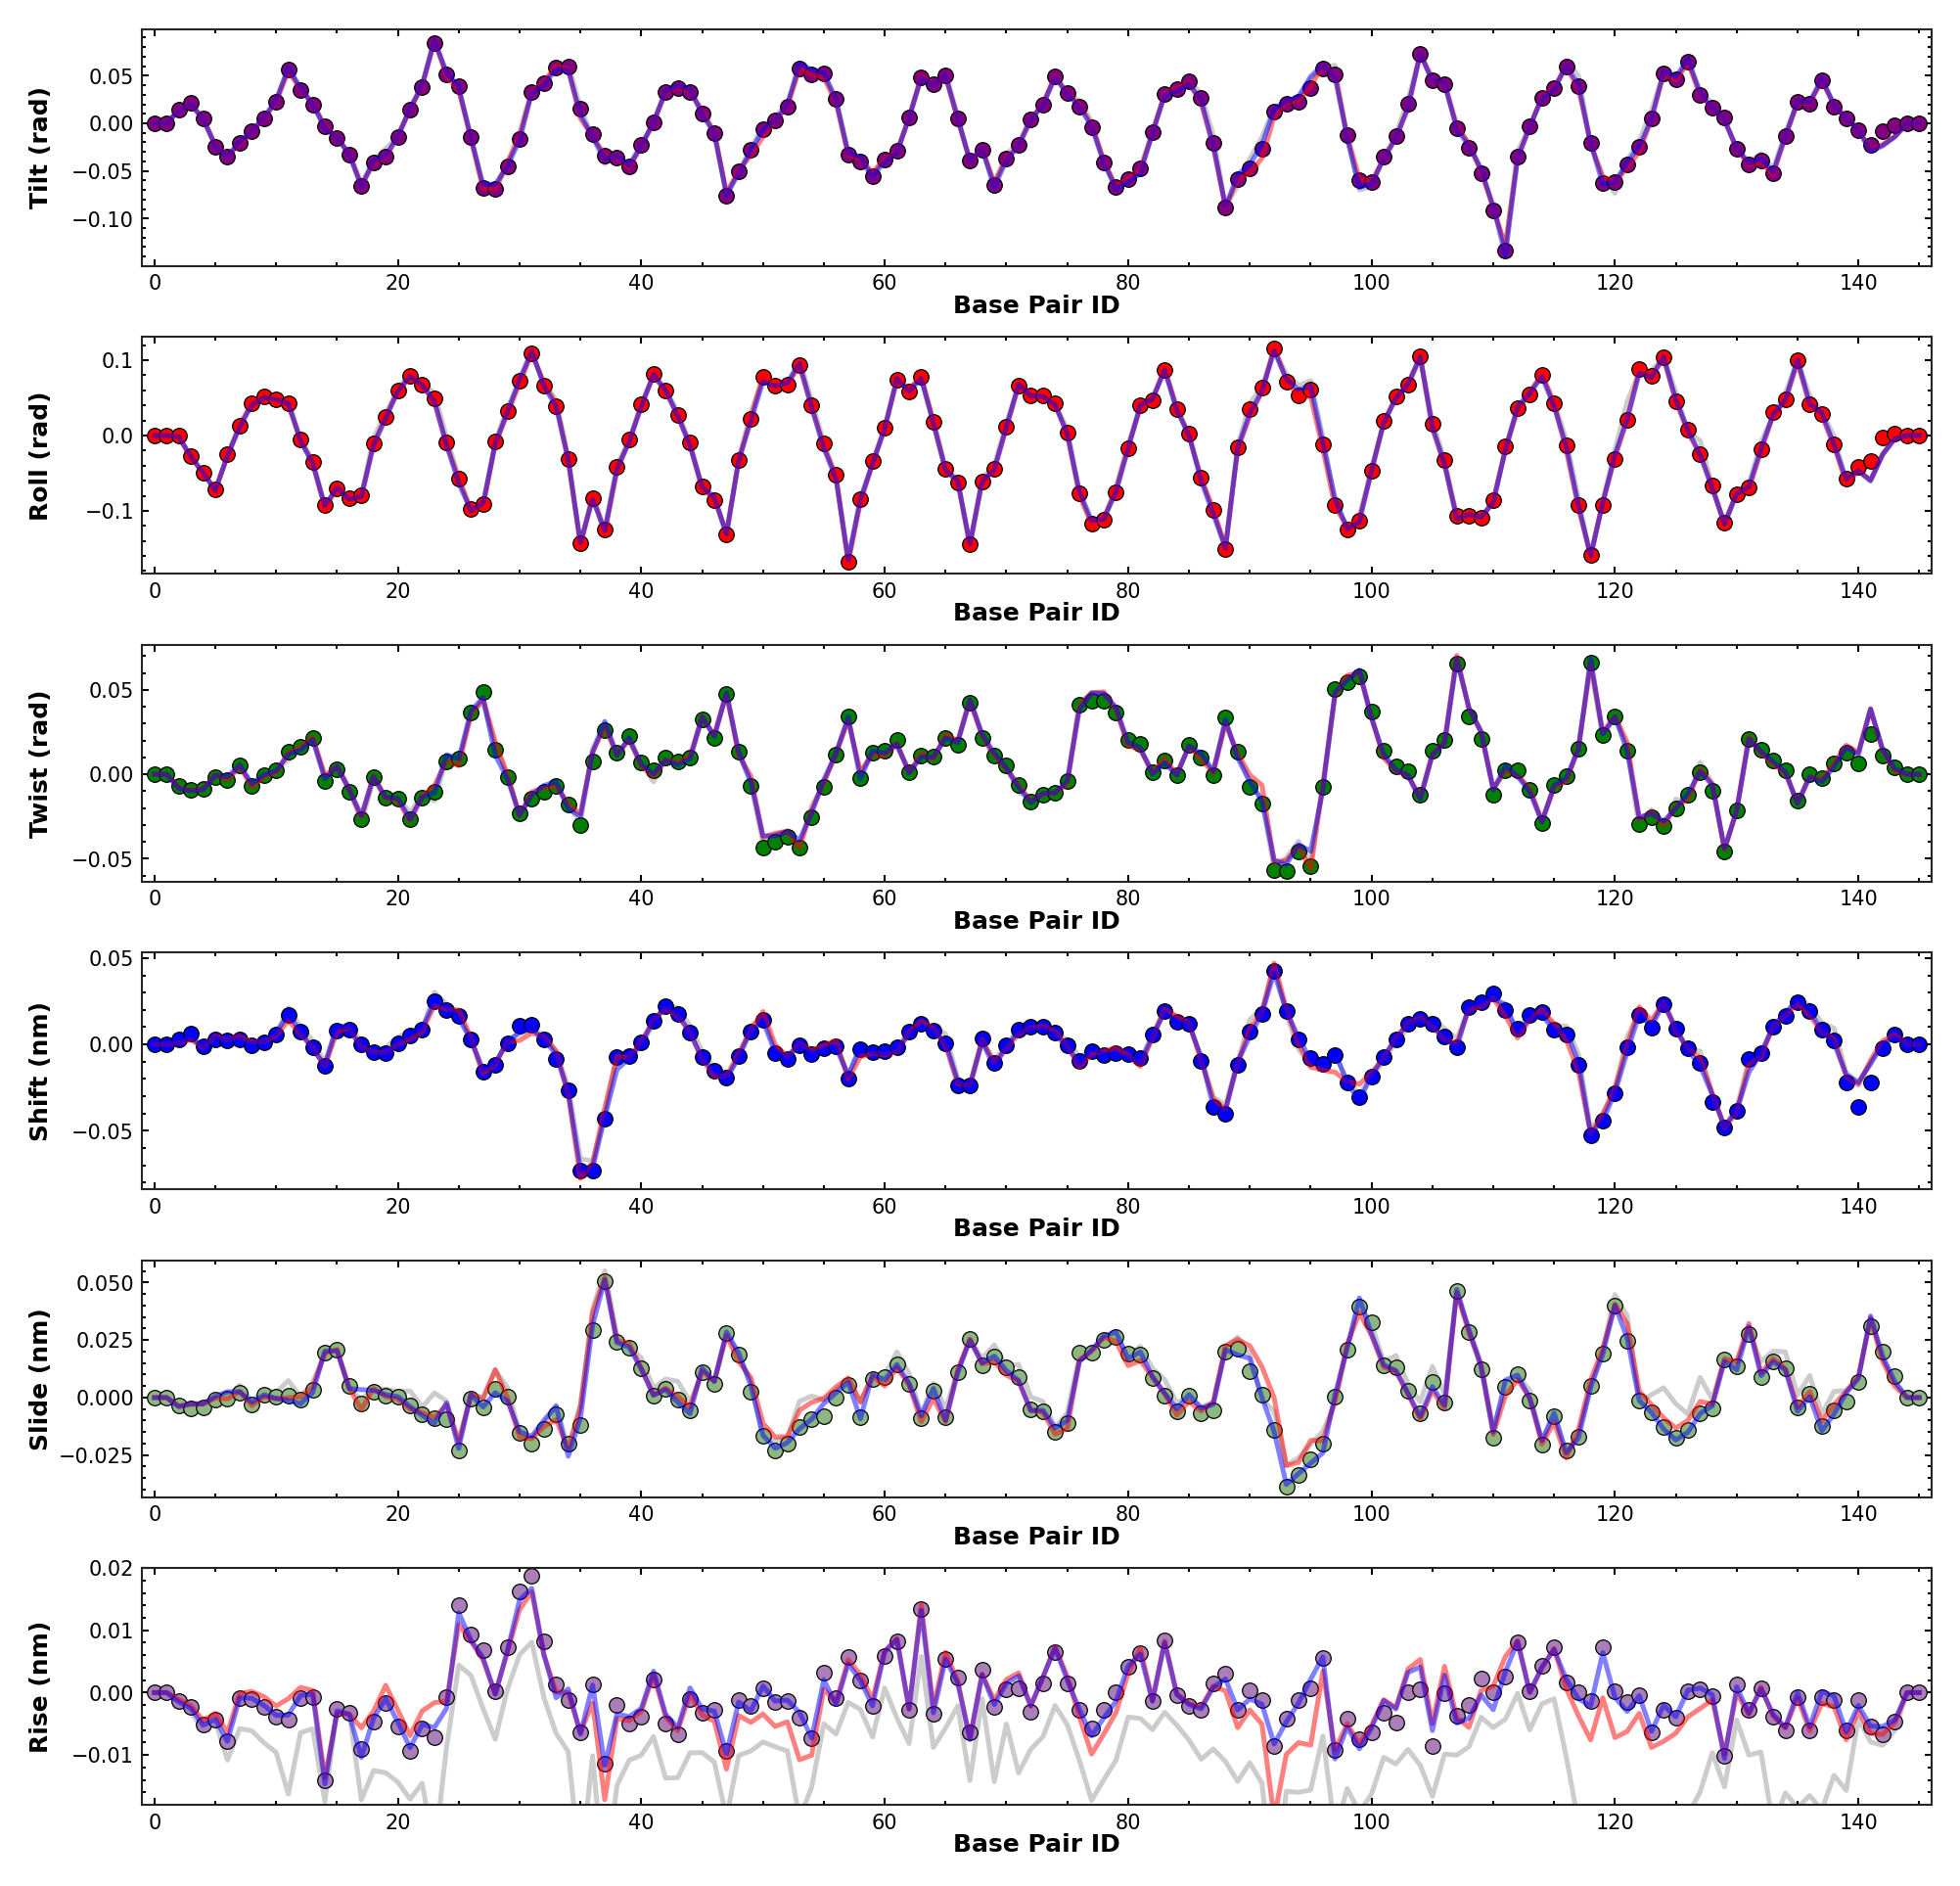

In [10]:
savefn = 'Figs/CompareGS'

##################################################
# general Figure Setup


axlinewidth  = 0.5
axtick_major_width  = 0.5
axtick_major_length = 1.6
axtick_minor_width  = 0.5
axtick_minor_length = 1

tick_pad        = 2
tick_labelsize  = 5
label_fontsize  = 6
legend_fontsize = 6

panel_label_fontsize = 8
label_fontweight= 'bold'
panel_label_fontweight= 'bold'

##################################################
# colors 
# base_colors  = ['#5694bf','#bf8156','#aa7fb7','#8cb77f']
colors = ['#5694bf','#bf8156','#aa7fb7','#8cb77f','blue','green','red','purple']
# colors = ['#2F0C1F','#432435','#6D5462','#97858F','#C0B6BB','#D2CBCF']
colors = colors[::-1]

markers = ['o','s','D','<']
base_size = [18,13,13.2]

##################################################
# Plot Specs

filled_markers = True
scatter_zorder = 3
scatter_alpha  = 0.8
plot_zorder    = 1

theory_ls = '-'
theory_alpha = 0.7

marker_size     = 10
marker_linewidth = 0.3
plot_linewidth  = 1

# ##################################################
# # Save Figure
# savefn = '/home/pol_schiessel/ensk996e/Projects/KinkingJan/Figs/kinks'


###########################################################################################
### FIGURE SETUP
###########################################################################################

fig_width = 8.6*2
fig_height = 16

def cm_to_inch(cm: float) -> float:
    return cm/2.54
fig = plt.figure(figsize=(cm_to_inch(fig_width), cm_to_inch(fig_height)), dpi=300,facecolor='w',edgecolor='k') 

ax1 = plt.subplot2grid(shape=(6, 1), loc=(0, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax2 = plt.subplot2grid(shape=(6, 1), loc=(1, 0), colspan=1,rowspan=1)
plt.minorticks_on()
ax3 = plt.subplot2grid(shape=(6, 1), loc=(2, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax4 = plt.subplot2grid(shape=(6, 1), loc=(3, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax5 = plt.subplot2grid(shape=(6, 1), loc=(4, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax6 = plt.subplot2grid(shape=(6, 1), loc=(5, 0), colspan=1,rowspan=1)
plt.minorticks_on() 


axes = [ax1,ax2,ax3,ax4,ax5,ax6]

######################################################################################################################################################
######################################################################################################################################################
# rotation curves

marker = markers[0]
labels = ['Tilt','Roll','Twist','Shift','Slide','Rise']
size = 14
bpids = np.arange(len(gs_num))


for i in range(6):
    ax = axes[i]
    label = labels[i]

    ax.set_xlabel('Base Pair ID',fontsize=label_fontsize,labelpad=2,fontweight=label_fontweight)
    if i < 3:
        ax.set_ylabel(f'{label} (rad)',fontsize=label_fontsize,fontweight=label_fontweight,labelpad=2)
    else:
        ax.set_ylabel(f'{label} (nm)',fontsize=label_fontsize,fontweight=label_fontweight,labelpad=2)

    color = colors[i]
    
    ax.scatter(bpids,gs_num[:,i],s=size,edgecolors='black',linewidth=marker_linewidth,color=color,label=label,marker=marker,zorder=2)
    # ax.plot(bpids,gs_num[:,0],linewidth=1,color=color,alpha=0.5)
    # ax.plot(bpids,gsv[:,i],linewidth=1,color='black',alpha=0.5)
    # ax.plot(bpids,gsv_corr[:,i],linewidth=1,color='red',alpha=0.5)
    ax.plot(bpids,gsv[:,i],linewidth=1.2,color='black',alpha=0.2,zorder=1)
    
    ax.plot(bpids,gsv_corr_old[:,i],linewidth=1.2,color='red',alpha=0.5,zorder=2)
    ax.plot(bpids,gsv_corr[:,i],linewidth=1.2,color='blue',alpha=0.5,zorder=2)
    
    
    # if i == 5:
    #     ax.plot(bpids,gsv[:,i],linewidth=1.2,color='black',alpha=0.2,zorder=1)
    ax.set_xlim((-1,146))
    
    ax.xaxis.set_label_coords(0.5,-0.12)
    ax.yaxis.set_label_coords(-0.05,0.5)
    
    
    # ax2.xaxis.set_label_coords(0.5,-0.08)
    # ax3.xaxis.set_label_coords(0.5,-0.08)
    # ax4.xaxis.set_label_coords(0.5,-0.08)

    # ax1.yaxis.set_label_coords(-0.12,0.5)
    # ax2.yaxis.set_label_coords(-0.13,0.5)
    # ax3.yaxis.set_label_coords(-0.12,0.5)
    # ax4.yaxis.set_label_coords(-0.13,0.5)

    # ax1.set_xlim((0,50))
    
ax6.set_ylim([-0.018,0.02])

# # ###############################
# # # legends
# # import itertools
# # def flip(items, ncol):
# #     return itertools.chain(*[items[i::ncol] for i in range(ncol)])

# ax1.legend(fontsize=legend_fontsize,borderpad=0.2,framealpha=0.5,fancybox=True,handletextpad=0.2,loc='lower left', bbox_to_anchor=(0.00,1.00),ncol=5,columnspacing=0.7)

# # handles, labels = ax1.get_legend_handles_labels()
# # ax1.legend(flip(handles, 3), flip(labels, 3),fontsize=legend_fontsize,borderpad=0.2,framealpha=0.5,fancybox=True,handletextpad=0.2,loc='lower left', bbox_to_anchor=(0.00,1.00),ncol=3,columnspacing=0.7)


for ax in axes:
    ###############################
    # set major and minor ticks
    ax.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)
    ax.tick_params(axis='both',which='minor',direction="in",width=axtick_minor_width,length=axtick_minor_length)
        # print(zl)
        # print(forces)
        
    ###############################
    ax.xaxis.set_ticks_position('both')
    # set ticks right and top
    ax.yaxis.set_ticks_position('both')
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axlinewidth)


plt.subplots_adjust(left=0.08,
                    right=0.98,
                    bottom=0.03,
                    top=0.99,
                    wspace=0.3,
                    hspace=0.3)

fig.savefig(savefn+'.pdf',dpi=300,transparent=True)
fig.savefig(savefn+'.svg',dpi=300,transparent=True)
fig.savefig(savefn+'.png',dpi=300,transparent=False)


In [5]:
a=b

NameError: name 'b' is not defined

### Free energies

In [ ]:
genstiff = methods.GenStiffness(method='hybrid')   # alternatively you can use the 'crystal' method for the Olson data
# genstiff = GenStiffness(method='md')   # alternatively you can use the 'crystal' method for the Olson data
seq601 = "ATCGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCGAT"
# seq601 = "GTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATAAAAATCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTCGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACG"
# seq601 = "GTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATAAAAAGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACGTCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTC"
# seq601 = "AAAAGCGCGCGCGCGATCTTATCTAGCTAGTACGATCGAAACTATCTAGCGACGATCATAAACGTCGCGGGCGATCTATTTTAGAGATCCTCTAAACCCGCATTCGCTCGTAGCCCCGATCGATCGATCGCGCGATCTAGCTATATA"

# 601
seq = "CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT"
# seq601 = 'TTCCACATGGATAATACAAGAGATTCATCGACGTGCTCATTTGGCATTAGGGCATCATCCTAATGAGATTCGGTGGCGCTAACAACTTCGCTGAAAGATCAGTGGAGCGAACTGCCCTACTGTTAATTGGGTACCAGACCTCCTCAC'
# # seq601 = 'ATTTGGCCTTAAAAAAACTTCCCCCTTCGCTATACAAGAGATTCATCGGAAAGATCAGTGGAGCGAACTGCCCTACATCATCCTAATGAGATTCGGTGCTGTTAATTGGGTACCAGACTTCCACGCGAAAAAATCGCGGGGGCACGA'
    
# seq = 'CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC'
# seq = 'ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATA'
  

    
stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

midstep_constraint_locations = [
    2, 6, 
    14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
Fdict = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
print(Fdict)

# gs = methods.nucleosome_groundstate(groundstate,stiffmat,midstep_constraint_locations,nuctriads)
# gsv = gs.reshape((len(gs)//6,6))

# gs_corr = methods.nucleosome_groundstate(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
# gsv_corr = gs_corr.reshape((len(gs)//6,6))



# # seq = 'CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC'
# seq = 'ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATA'
   
# stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)

# Fdict_at = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
# print(Fdict_at)

# # 
# fe_cg = 159.3362
# fe_at = 187.2130


# fe_cg = 159.8341
# fe_at = 189.5030

# print(fe_at - fe_cg)

# print(Fdict_at['F'] - Fdict['F'])








In [ ]:
seq = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
# seq = 'CCGCTCAATTGGTCGTAGACAGCTCGCACGTACGCCTGGAGAATCCCGGTGCCGAGGGCTGTCCCCCGCGTTTCCCTAGTCTTAACTCCAGGCACGTGTTAGCACCGCTTAAACCAGATATATACATCCTGTCGCCAAGGGGATTAC'

# seq = 'AGGCGCGCGAAGCGAGGAGCAGCGATCTTTATCGAGCTTAGCGATCTATATATACGAGAGAGATGTGTAGCGCGCGATCGATCGATTAGATCGAGGAGAGCTTTCGAGCGATCGAAAAAAAAACCGAGCGGGGGGCTATTCTGCGCG'
    
stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
Fdict1 = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
print(Fdict1)


# seq = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
seq = 'CCGCTCAATTGGTCGTAGACAGCTCGCACGTACGCCTGGAGAATCCCGGTGCCGAGGGCTGTCCCCCGCGTTTCCCTAGTCTTAACTCCAGGCACGTGTTAGCACCGCTTAAACCAGATATATACATCCTGTCGCCAAGGGGATTAC'


# seq = 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC'
# seq = 'CG'*147
# seq = 'G'*147
# seq = seq[:147]



stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
Fdict2 = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
print(Fdict2)

print(Fdict2['F'] - Fdict1['F'] )



### Translational Positioning

In [ ]:
seqfn = 'Data/transpos/601_ext25'
# seqfn = 'Data/transpos/601_ext100'
method = 'hybrid'
midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]

genstiff = methods.GenStiffness(method=method)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

################################################
with open(seqfn,'r') as f:
    total_seq = f.readline().strip()
base_len = 147 

hs = []
fs = []
print(len(total_seq))


for i in range(len(total_seq)-base_len+1):
    seq = total_seq[i:i+base_len]
        
    stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
    Fdict = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True) 
    hs.append(Fdict['F_const'])
    fs.append(Fdict['F'])
    print(Fdict['F_const'])

np.save(seqfn+'_enth_th',np.array(hs))
np.save(seqfn+'_fe_th',np.array(fs))

### Check cgNA+

In [ ]:
stifffn = 'Data/transpos/cgnap/601_ext25_cg1_stiff.npz'
gsfn    = 'Data/transpos/cgnap/601_ext25_cg1_gs.npy'
seqfn   = 'Data/transpos/cgnap/601_ext25.seq'
baseout = 'Data/transpos/cgnap/601_cgnap_ext25'



fullstiff = sp.sparse.load_npz(stifffn)
# stiff = sp.sparse.lil_matrix(stiff)
fullgs    = np.load(gsfn)


midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]

triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)

################################################
with open(seqfn,'r') as f:
    total_seq = f.readline().strip()
base_len = 147 

hs = []
fs = []
print(len(total_seq))

method = 'hybrid'
genstiff = methods.GenStiffness(method=method)

for i in range(len(total_seq)-base_len+1):
    seq = total_seq[i:i+base_len]
    
    stiffmat = fullstiff[i*6:(i+base_len-1)*6,i*6:(i+base_len-1)*6].toarray()
    # stiffmat = stiffmat * 45/70
    groundstate = fullgs[i:(i+base_len-1)]
       
    # sm,gs = genstiff.gen_params(seq,use_group=True)  
    # stiffmat = sm
    
    # # print(len(sm)//6)
    # print(stiffmat.shape)
    # print(groundstate.flatten().shape)
    # print(len(groundstate.flatten())//6)
        
    Fdict = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True) 
    hs.append(Fdict['F_const'])
    fs.append(Fdict['F'])
    print(Fdict['F_const'])

np.save(baseout+'_enth_th',np.array(hs))
np.save(baseout+'_fe_th',np.array(fs))

### Random groundstate ensemble

In [ ]:
def randseq(N):
    return ''.join(['ATCG'[np.random.randint(4)] for i in range(N)])

num_seqs = 1000

genstiff = methods.GenStiffness(method='hybrid')
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)
midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
gss = list()
for i in range(num_seqs):
    seq = randseq(147)
    print(f'{i+1}/{num_seqs} {seq}')
    stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
    gs = methods.nucleosome_groundstate(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
    gss.append(gs)


### Evaluate local distributions

In [ ]:
gsscp = np.array(gss).reshape((len(gss),146,6))
means = np.mean(gsscp,axis=0)
stds  = np.std(gsscp,axis=0)

stdrge = 2

lowers = means - stdrge*stds
uppers = means + stdrge*stds

lowers = np.min(gsscp,axis=0)
uppers = np.max(gsscp,axis=0)


In [ ]:
savefn = 'Figs/gs_range'

##################################################
# general Figure Setup


axlinewidth  = 0.5
axtick_major_width  = 0.5
axtick_major_length = 1.6
axtick_minor_width  = 0.5
axtick_minor_length = 1

tick_pad        = 2
tick_labelsize  = 5
label_fontsize  = 6
legend_fontsize = 6

panel_label_fontsize = 8
label_fontweight= 'bold'
panel_label_fontweight= 'bold'

##################################################
# colors 
# base_colors  = ['#5694bf','#bf8156','#aa7fb7','#8cb77f']
colors = ['#5694bf','#bf8156','#aa7fb7','#8cb77f','blue','green','red','purple']
# colors = ['#2F0C1F','#432435','#6D5462','#97858F','#C0B6BB','#D2CBCF']
colors = colors[::-1]

markers = ['o','s','D','<']
base_size = [18,13,13.2]

##################################################
# Plot Specs

filled_markers = True
scatter_zorder = 3
scatter_alpha  = 0.8
plot_zorder    = 1

theory_ls = '-'
theory_alpha = 0.7

marker_size     = 10
marker_linewidth = 0.3
plot_linewidth  = 1

# ##################################################
# # Save Figure
# savefn = '/home/pol_schiessel/ensk996e/Projects/KinkingJan/Figs/kinks'


###########################################################################################
### FIGURE SETUP
###########################################################################################

fig_width = 8.6*2
fig_height = 16

def cm_to_inch(cm: float) -> float:
    return cm/2.54
fig = plt.figure(figsize=(cm_to_inch(fig_width), cm_to_inch(fig_height)), dpi=300,facecolor='w',edgecolor='k') 

ax1 = plt.subplot2grid(shape=(6, 1), loc=(0, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax2 = plt.subplot2grid(shape=(6, 1), loc=(1, 0), colspan=1,rowspan=1)
plt.minorticks_on()
ax3 = plt.subplot2grid(shape=(6, 1), loc=(2, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax4 = plt.subplot2grid(shape=(6, 1), loc=(3, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax5 = plt.subplot2grid(shape=(6, 1), loc=(4, 0), colspan=1,rowspan=1)
plt.minorticks_on() 
ax6 = plt.subplot2grid(shape=(6, 1), loc=(5, 0), colspan=1,rowspan=1)
plt.minorticks_on() 


axes = [ax1,ax2,ax3,ax4,ax5,ax6]

######################################################################################################################################################
######################################################################################################################################################
# rotation curves

marker = markers[0]
labels = ['Tilt','Roll','Twist','Shift','Slide','Rise']
size = 14

bpids = np.arange(146)


for i in range(6):
    ax = axes[i]
    label = labels[i]

    ax.set_xlabel('Base Pair ID',fontsize=label_fontsize,labelpad=2,fontweight=label_fontweight)
    if i < 3:
        ax.set_ylabel(f'{label} (rad)',fontsize=label_fontsize,fontweight=label_fontweight,labelpad=2)
    else:
        ax.set_ylabel(f'{label} (nm)',fontsize=label_fontsize,fontweight=label_fontweight,labelpad=2)

    ax.xaxis.set_label_coords(0.5,-0.12)
    ax.yaxis.set_label_coords(-0.05,0.5)
    
    
    ax.plot(bpids,means[:,i],linewidth=1,alpha=1,zorder=1)
    ax.fill_between(bpids,lowers[:,i],uppers[:,i],color='grey',alpha=0.5)
    
    # ax.plot(bpids,gsscp[10,:,i],linewidth=1,alpha=1,zorder=1)
    
    
    
    # for j in range(len(gss)):

    #     ax.plot(bpids,gss[j].reshape((146,6))[:,i],linewidth=1,alpha=0.2,zorder=1)
    
    

    ax.set_xlim((-1,146))
    
    
    # ax2.xaxis.set_label_coords(0.5,-0.08)
    # ax3.xaxis.set_label_coords(0.5,-0.08)
    # ax4.xaxis.set_label_coords(0.5,-0.08)

    # ax1.yaxis.set_label_coords(-0.12,0.5)
    # ax2.yaxis.set_label_coords(-0.13,0.5)
    # ax3.yaxis.set_label_coords(-0.12,0.5)
    # ax4.yaxis.set_label_coords(-0.13,0.5)

    # ax1.set_xlim((0,50))
    

# # ###############################
# # # legends
# # import itertools
# # def flip(items, ncol):
# #     return itertools.chain(*[items[i::ncol] for i in range(ncol)])

# ax1.legend(fontsize=legend_fontsize,borderpad=0.2,framealpha=0.5,fancybox=True,handletextpad=0.2,loc='lower left', bbox_to_anchor=(0.00,1.00),ncol=5,columnspacing=0.7)

# # handles, labels = ax1.get_legend_handles_labels()
# # ax1.legend(flip(handles, 3), flip(labels, 3),fontsize=legend_fontsize,borderpad=0.2,framealpha=0.5,fancybox=True,handletextpad=0.2,loc='lower left', bbox_to_anchor=(0.00,1.00),ncol=3,columnspacing=0.7)


for ax in axes:
    ###############################
    # set major and minor ticks
    ax.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)
    ax.tick_params(axis='both',which='minor',direction="in",width=axtick_minor_width,length=axtick_minor_length)
        # print(zl)
        # print(forces)
        
    ###############################
    ax.xaxis.set_ticks_position('both')
    # set ticks right and top
    ax.yaxis.set_ticks_position('both')
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axlinewidth)


plt.subplots_adjust(left=0.08,
                    right=0.98,
                    bottom=0.03,
                    top=0.99,
                    wspace=0.3,
                    hspace=0.3)

fig.savefig(savefn+'.pdf',dpi=300,transparent=True)
fig.savefig(savefn+'.svg',dpi=300,transparent=True)
fig.savefig(savefn+'.png',dpi=300,transparent=False)


### Test midstep locations

In [ ]:

genstiff = methods.GenStiffness(method='hybrid')
seq = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
seq = 'AGGCGCGCGAAGCGAGGAGCAGCGATCTTTATCGAGCTTAGCGATCTATATATACGAGAGAGATGTGTAGCGCGCGATCGATCGATTAGATCGAGGAGAGCTTTCGAGCGATCGAAAAAAAAACCGAGCGGGGGGCTATTCTGCGCG'

stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
triadfn = 'methods/State/Nucleosome.state'
nuctriads = methods.read_nucleosome_triads(triadfn)




midstep_constraint_locations = [
    2, 6, 14, 17, 24, 29, 
    34, 38, 45, 49, 55, 59, 
    65, 69, 76, 80, 86, 90, 
    96, 100, 107, 111, 116, 121, 
    128, 131, 139, 143
]
Fdict1 = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
print(Fdict1)


# seq = 'CTGGAGAATCCCGGTGCCGAGGCCGCTCAATTGGTCGTAGACAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCCCCCGCGTTTTAACCGCCAAGGGGATTACTCCCTAGTCTCCAGGCACGTGTCAGATATATACATCCTGT'
# stiffmat,groundstate = genstiff.gen_params(seq,use_group=True)
# triadfn = 'methods/State/Nucleosome.state'
# nuctriads = methods.read_nucleosome_triads(triadfn)

de = []
df = []

for i in range(len(midstep_constraint_locations)):
    midstep_constraint_locations = [
        2, 6, 14, 17, 24, 29, 
        34, 38, 45, 49, 55, 59, 
        65, 69, 76, 80, 86, 90, 
        96, 100, 107, 111, 116, 121, 
        128, 131, 139, 143
    ]

    midstep_constraint_locations = np.array(midstep_constraint_locations)
    midstep_constraint_locations[i:] += 1

    Fdict2 = methods.nucleosome_free_energy(groundstate,stiffmat,midstep_constraint_locations,nuctriads,use_correction=True)
    # print(Fdict2)

    print(Fdict2['F'] - Fdict1['F'] )
    print(Fdict2['F_const'] - Fdict1['F_const'] )

    df.append(Fdict2['F'] - Fdict1['F'])
    de.append(Fdict2['F_const'] - Fdict1['F_const'])


mid = np.arange(len(df))
plt.plot(mid,de)
plt.plot(mid,df)
